In [2]:
!pip install request_html

ERROR: Could not find a version that satisfies the requirement request_html (from versions: none)
ERROR: No matching distribution found for request_html


In [7]:
!pip install yahoo_fin

     |████████████████████████████████| 81 kB 2.3 MB/s 
     |████████████████████████████████| 83 kB 981 kB/s 
     |████████████████████████████████| 127 kB 30.7 MB/s 
     |████████████████████████████████| 111 kB 52.7 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=1d43c174ed3fba596b74ede9c2a3b91c1576b9be201d287a69b4ffa9d9267efb
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=c9be56c3cba5e482f5855b411b87f1e214e50aab3a7eba628e1c7ce7d2d22149
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=40e3c755b2be89c96466644b777887add8abebbe81270ed393fcbd7cfa5ff4fc
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [8]:
from yahoo_fin import stock_info as si

In [6]:
si.get_live_price('aapl')

154.72999572753906

In [7]:
si.get_live_price('PETR4.SA')

32.4900016784668

In [8]:
round(si.get_live_price('PETR4.SA'),2)

32.49

In [9]:
round(si.get_live_price('ETH-USD'),2)

2587.65

## Criando loop para extração de cotação ao vivo

In [1]:
import time 
import datetime
import pandas as pd

In [18]:
n = 10
tempo = time.time() + 60*n
a = 0
df = pd.DataFrame(columns=['Hora', 'Preco'])

In [19]:
while time.time() < tempo:
  
  preco = round(si.get_live_price('ETH-USD'),2)
  tempo_real = datetime.datetime.fromtimestamp(time.time())
  tempo_real = tempo_real.strftime("%d-%b-%Y %H:%M:%S")

  d = {'Hora' : tempo_real, 'Preco' : preco}

  print(d)

  linha = pd.DataFrame(data = d, index = [a])

  a += 1

  df = pd.concat([df, linha], ignore_index=True)

  time.sleep(5)


{'Hora': '14-Mar-2022 01:56:34', 'Preco': 2528.13}
{'Hora': '14-Mar-2022 01:56:39', 'Preco': 2528.13}
{'Hora': '14-Mar-2022 01:56:45', 'Preco': 2528.13}
{'Hora': '14-Mar-2022 01:56:50', 'Preco': 2528.13}
{'Hora': '14-Mar-2022 01:56:55', 'Preco': 2528.13}
{'Hora': '14-Mar-2022 01:57:00', 'Preco': 2528.13}
{'Hora': '14-Mar-2022 01:57:05', 'Preco': 2528.13}
{'Hora': '14-Mar-2022 01:57:10', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:57:16', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:57:21', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:57:26', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:57:31', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:57:36', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:57:42', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:57:47', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:57:52', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:57:57', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:58:02', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:58:08', 'Preco': 2528.95}
{'Hora': '14-Mar-2022 01:58:13'

In [20]:
df.head()

,Hora,Preco
0,14-Mar-2022 01:56:34,2528.13
1,14-Mar-2022 01:56:39,2528.13
2,14-Mar-2022 01:56:45,2528.13
3,14-Mar-2022 01:56:50,2528.13
4,14-Mar-2022 01:56:55,2528.13


In [21]:
df.index = df['Hora']

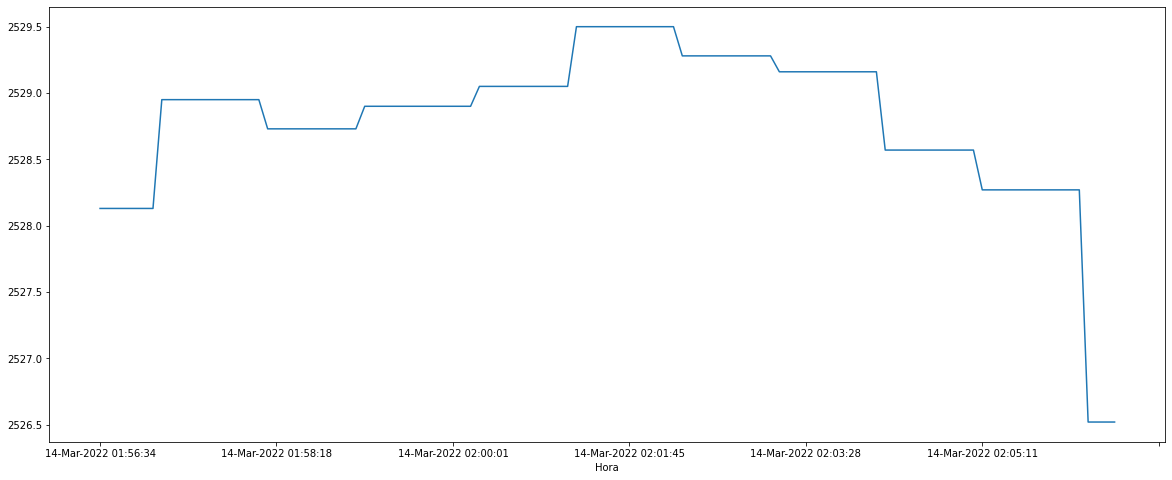

In [22]:
df['Preco'].plot(figsize=(20,8));